In [1]:
import pandas as pd
pd.options.display.max_columns = 100

In [2]:
muts_df = pd.read_pickle("./data/4_7_df.pkl")
display(muts_df.shape, muts_df.head())

(2641, 45)

,index,Details,mutation target annotation,Mutation Type,Position,Reference Seq,Sequence Change,ale,exp,flask,isolate,presence,tech_rep,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,2,R110G (CGT→GGT),clsA,SNP,1308318,NaN,G→C,1,42C,124,1,1.0,1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,6,None,rph,DEL,3815859,NaN,Δ82 bp,1,42C,124,1,1.0,1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism'}, {'name': '...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,7,A734V (GCG→GTG),rpoC,SNP,4187550,NaN,C→T,1,42C,124,1,1.0,1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism'}, {'name': 'Pyri...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,8,D9A (GAT→GCT),hfq,SNP,4400313,NaN,A→C,1,42C,124,1,1.0,1,True,"(4400313, 4400313)",{ECK120000431},"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",False,False,{},{},{},{},{},True,"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",{'ECK120000431': ['ECK120000431']},[{'name': 'yjeF-tsaE-amiB-mutL-miaA-hfq-hflXKC...,{'ECK125147410': ['ECK120000431']},"[{'name': 'CRP', 'significantly associated con...",{'CRP': ['yjeF-tsaE-amiB-mutL-miaA-hfq-hflXKC']},[],{},[{'name': 'Signal transduction mechanisms'}],{'Signal transduction mechanisms': ['ECK125147...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
4,0,coding (380‑400/1149 nt),nagA,DEL,702352,NaN,Δ21 bp,1,42C,124,1,1.0,1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'CRP': ['nagBAC-umpH'], 'NagC': ['nagBAC-umpH...","[{'name': 'Galactose metabolism'}, {'name': 'A...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [3]:
cyaA_crr_crp_mut_ale_df = pd.DataFrame()
for exp_ale, exp_ale_mut_df in muts_df.groupby(["exp","ale"]):
    next_ale = False
    for _, r in exp_ale_mut_df.iterrows():
        for f in r["genetic features"]:
            if (f["name"] == "cyaA") \
            or (f["name"] == "crp") \
            or (f["name"] == "crr"):
                next_ale = True
                break
        if next_ale:
            cyaA_crr_crp_mut_ale_df = cyaA_crr_crp_mut_ale_df.append(exp_ale_mut_df)
            break  # break out of this experiment and into next since this one can already be considered as part of the dataset
muts_df = cyaA_crr_crp_mut_ale_df
muts_df

,index,Details,mutation target annotation,Mutation Type,Position,Reference Seq,Sequence Change,ale,exp,flask,isolate,presence,tech_rep,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
242,13,S436G (AGT→GGT),lsrK,SNP,1598904,NaN,T→C,9,Central_carbon_knockout_PTS,131,0,0.56,1,True,"(1598904, 1598904)",{ECK120003387},"[{'name': 'lsrK', 'RegulonDB ID': 'ECK12000338...",False,False,{},{},{},{},{},True,"[{'name': 'lsrK', 'RegulonDB ID': 'ECK12000338...",{'ECK120003387': ['ECK120003387']},"[{'name': 'lsrRK', 'RegulonDB ID': 'ECK1200350...",{'ECK120035063': ['ECK120003387']},"[{'name': 'LsrR', 'significantly associated co...","{'LsrR': ['lsrRK'], 'CRP': ['lsrRK']}","[{'name': 'Lipopolysaccharide biosynthesis'}, ...",{'Lipopolysaccharide biosynthesis': ['ECK12003...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
243,7,Y73H (TAC→CAC),rcsB,SNP,2316393,NaN,T→C,9,Central_carbon_knockout_PTS,131,0,1.00,1,True,"(2316393, 2316393)",{ECK120000812},"[{'name': 'rcsB', 'RegulonDB ID': 'ECK12000081...",False,False,{},{},{},{},{},True,"[{'name': 'rcsB', 'RegulonDB ID': 'ECK12000081...",{'ECK120000812': ['ECK120000812']},"[{'name': 'rcsDB', 'RegulonDB ID': 'ECK1200305...",{'ECK120030532': ['ECK120000812']},"[{'name': 'H-NS', 'significantly associated co...",{'H-NS': ['rcsDB']},[],{},[{'name': 'Signal transduction mechanisms'}],{'Signal transduction mechanisms': ['ECK120030...,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
244,8,V195A (GTC→GCC),rcsB,SNP,2316760,NaN,T→C,9,Central_carbon_knockout_PTS,131,0,1.00,1,True,"(2316760, 2316760)",{ECK120000812},"[{'name': 'rcsB', 'RegulonDB ID': 'ECK12000081...",False,False,{},{},{},{},{},True,"[{'name': 'rcsB', 'RegulonDB ID': 'ECK12000081...",{'ECK120000812': ['ECK120000812']},"[{'name': 'rcsDB', 'RegulonDB ID': 'ECK1200305...",{'ECK120030532': ['ECK120000812']},"[{'name': 'H-NS', 'significantly associated co...",{'H-NS': ['rcsDB']},[],{},[{'name': 'Signal transduction mechanisms'}],{'Signal transduction mechanisms': ['ECK120030...,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
245,9,A274V (GCA→GTA),nlpI,SNP,3308104,NaN,G→A,9,Central_carbon_knockout_PTS,131,1,1.00,1,True,"(3308104, 3308104)",{ECK120002239},"[{'name': 'nlpI', 'RegulonDB ID': 'ECK12000223...",False,False,{},{ECK120051397},{},{},{},True,"[{'name': 'yrbNp', 'RegulonDB ID': 'ECK1200513...","{'ECK120002239': ['ECK120051397', 'ECK12000223...","[{'name': 'yrbN-deaD', 'RegulonDB ID': 'ECK125...","{'ECK125095394': ['ECK120002239'], 'ECK1200282...",[],{},[],{},"[{'name': 'Replication, recombination and repa...","{'Replication, recombination and repair': ['EC...",37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
246,10,coding (1190‑1194/2136 nt),yrfF,DEL,3527658,NaN,Δ5 bp,9,Central_carbon_knockout_PTS,131,0,1.00,1,True,"(3527658, 3527662)",{ECK120004284},"[{'name': 'yrfF', 'RegulonDB ID': 'ECK12000428...",False,False,{},{},{},{},{},True,"[{'name': 'yrfF', 'RegulonDB ID': 'ECK12000428...",{'ECK120004284': ['ECK120004284']},"[{'name': 'yrfF', 'RegulonDB ID': 'ECK12002832...",{'ECK120028328': ['ECK120004284']},[],{},[],{},[],{},37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
muts_df["sample"] = muts_df.apply(lambda r:
                                  r.exp
                                  + ' ' + str(r["ale"])
                                  + ' ' + str(r["flask"])
                                  + ' ' + str(r["isolate"])
#                                   + ' ' + str(r["tech_rep"])  # commented these out since the mutations that are represented are those with highest freq across sample replications from the same flask, therefore there shouldn't be any mutation overlap between the sample replicates from the same flask.
                                          , axis=1
                                 )
muts_df.head()

,index,Details,mutation target annotation,Mutation Type,Position,Reference Seq,Sequence Change,ale,exp,flask,isolate,presence,tech_rep,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,sample
242,13,S436G (AGT→GGT),lsrK,SNP,1598904,NaN,T→C,9,Central_carbon_knockout_PTS,131,0,0.56,1,True,"(1598904, 1598904)",{ECK120003387},"[{'name': 'lsrK', 'RegulonDB ID': 'ECK12000338...",False,False,{},{},{},{},{},True,"[{'name': 'lsrK', 'RegulonDB ID': 'ECK12000338...",{'ECK120003387': ['ECK120003387']},"[{'name': 'lsrRK', 'RegulonDB ID': 'ECK1200350...",{'ECK120035063': ['ECK120003387']},"[{'name': 'LsrR', 'significantly associated co...","{'LsrR': ['lsrRK'], 'CRP': ['lsrRK']}","[{'name': 'Lipopolysaccharide biosynthesis'}, ...",{'Lipopolysaccharide biosynthesis': ['ECK12003...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),Central_carbon_knockout_PTS 9 131 0
243,7,Y73H (TAC→CAC),rcsB,SNP,2316393,NaN,T→C,9,Central_carbon_knockout_PTS,131,0,1.00,1,True,"(2316393, 2316393)",{ECK120000812},"[{'name': 'rcsB', 'RegulonDB ID': 'ECK12000081...",False,False,{},{},{},{},{},True,"[{'name': 'rcsB', 'RegulonDB ID': 'ECK12000081...",{'ECK120000812': ['ECK120000812']},"[{'name': 'rcsDB', 'RegulonDB ID': 'ECK1200305...",{'ECK120030532': ['ECK120000812']},"[{'name': 'H-NS', 'significantly associated co...",{'H-NS': ['rcsDB']},[],{},[{'name': 'Signal transduction mechanisms'}],{'Signal transduction mechanisms': ['ECK120030...,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),Central_carbon_knockout_PTS 9 131 0
244,8,V195A (GTC→GCC),rcsB,SNP,2316760,NaN,T→C,9,Central_carbon_knockout_PTS,131,0,1.00,1,True,"(2316760, 2316760)",{ECK120000812},"[{'name': 'rcsB', 'RegulonDB ID': 'ECK12000081...",False,False,{},{},{},{},{},True,"[{'name': 'rcsB', 'RegulonDB ID': 'ECK12000081...",{'ECK120000812': ['ECK120000812']},"[{'name': 'rcsDB', 'RegulonDB ID': 'ECK1200305...",{'ECK120030532': ['ECK120000812']},"[{'name': 'H-NS', 'significantly associated co...",{'H-NS': ['rcsDB']},[],{},[{'name': 'Signal transduction mechanisms'}],{'Signal transduction mechanisms': ['ECK120030...,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),Central_carbon_knockout_PTS 9 131 0
245,9,A274V (GCA→GTA),nlpI,SNP,3308104,NaN,G→A,9,Central_carbon_knockout_PTS,131,1,1.00,1,True,"(3308104, 3308104)",{ECK120002239},"[{'name': 'nlpI', 'RegulonDB ID': 'ECK12000223...",False,False,{},{ECK120051397},{},{},{},True,"[{'name': 'yrbNp', 'RegulonDB ID': 'ECK1200513...","{'ECK120002239': ['ECK120051397', 'ECK12000223...","[{'name': 'yrbN-deaD', 'RegulonDB ID': 'ECK125...","{'ECK125095394': ['ECK120002239'], 'ECK1200282...",[],{},[],{},"[{'name': 'Replication, recombination and repa...","{'Replication, recombination and repair': ['EC...",37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),Central_carbon_knockout_PTS 9 131 1
246,10,coding (1190‑1194/2136 nt),yrfF,DEL,3527658,NaN,Δ5 bp,9,Central_carbon_knockout_PTS,131,0,1.00,1,True,"(3527658, 3527662)",{ECK120004284},"[{'name': 'yrfF', 'RegulonDB ID': 'ECK12000428...",False,False,{},{},{},{},{},True,"[{'name': 'yrfF', 'RegulonDB ID': 'ECK12000428...",{'ECK120004284': ['ECK120004284']},"[{'name': 'yrfF', 'RegulonDB ID': 'ECK12002832...",{'ECK120028328': ['ECK120004284']},[],{},[],{},[],{},37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9

In [5]:
sample_feat_df = pd.DataFrame()
for _, m in muts_df.iterrows():
    for mut_feat in m["genetic features"]:  # Currently not doing "genomic features" since there's a bug to fix WRT to TFBS getting named "zwf zwf TFBS", aldA aldA aldA TFBS, and likely more of the same
        sample_feat_df = sample_feat_df.append(ignore_index=True, other={"sample": m["sample"], "mutated feature": mut_feat["name"]})
#         if "TFBS" not in mut_feat["name"]:  # Don't want to be analyzing the TFBS WRT to correlations
#             sample_feat_df = sample_feat_df.append(ignore_index=True, other={"sample": m["sample"], "mutated feature": mut_feat["name"]})
sample_feat_df.head()

,mutated feature,sample
0,lsrK,Central_carbon_knockout_PTS 9 131 0
1,rcsB,Central_carbon_knockout_PTS 9 131 0
2,rcsB,Central_carbon_knockout_PTS 9 131 0
3,nlpI,Central_carbon_knockout_PTS 9 131 1
4,yrfF,Central_carbon_knockout_PTS 9 131 0


In [6]:
cross_counts_df = pd.crosstab(
        sample_feat_df["mutated feature"], sample_feat_df["sample"]
    )
cross_counts_df = cross_counts_df.T  # correlation matrix needs the targets to be the columns
cross_counts_df.head()

mutated feature,abpA,acnB,adiY/adiA,aidB,aroA,arpB_1,aspA,astA,astC,atpH,bcsQ,bipA,borD,borD/ybcV,carB/caiF,casD/casC,cca,ccmB,cdd,cheB,chiP,citG,clcA,clcB,corA,cpxA,cpxR,cra,crl,crp,crr,cyaA,cysB,deoR,dhaK,dmlR,dmlR/dmlA,dmsD,dnaT,dppB,dusC,ecpC,ecpR/ykgL,emrK,essD,ettA,fbaA,fhlA,fhuB,fimF,...,ybhD,ybhP/ybhQ,ycaO,yciV,ycjT,ydaG/racR,ydbA_1,ydcV,ydeK,ydfJ/ydfK,ydiR,yeaD/yeaE,yeaG,yeaR,yeaV,yedP,yeeJ,yegX,yejO,yfdE,yfdX/ypdI,yfeH,yfeR,yfgM,yfjI,ygaZ,ygbI,ygeR,yhaL,yhdJ,yhdN/rplQ,yhdZ,yhhQ,yhjC,yihQ,yiiD,yjaH,yjbH,yjhU,yjhU/yjhF,yjhW,yjjY/yjtD,ykfA,ykgF,ymfE/lit,yqfG,yrfF,ysaD,ysgA,zraR
sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Central_carbon_knockout_PTS 9 131 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Central_carbon_knockout_PTS 9 131 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Central_carbon_knockout_pgi 9 39 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
GYD 1 280 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GYD 10 106 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
corr = cross_counts_df.corr()
corr.head()

mutated feature,abpA,acnB,adiY/adiA,aidB,aroA,arpB_1,aspA,astA,astC,atpH,bcsQ,bipA,borD,borD/ybcV,carB/caiF,casD/casC,cca,ccmB,cdd,cheB,chiP,citG,clcA,clcB,corA,cpxA,cpxR,cra,crl,crp,crr,cyaA,cysB,deoR,dhaK,dmlR,dmlR/dmlA,dmsD,dnaT,dppB,dusC,ecpC,ecpR/ykgL,emrK,essD,ettA,fbaA,fhlA,fhuB,fimF,...,ybhD,ybhP/ybhQ,ycaO,yciV,ycjT,ydaG/racR,ydbA_1,ydcV,ydeK,ydfJ/ydfK,ydiR,yeaD/yeaE,yeaG,yeaR,yeaV,yedP,yeeJ,yegX,yejO,yfdE,yfdX/ypdI,yfeH,yfeR,yfgM,yfjI,ygaZ,ygbI,ygeR,yhaL,yhdJ,yhdN/rplQ,yhdZ,yhhQ,yhjC,yihQ,yiiD,yjaH,yjbH,yjhU,yjhU/yjhF,yjhW,yjjY/yjtD,ykfA,ykgF,ymfE/lit,yqfG,yrfF,ysaD,ysgA,zraR
mutated feature,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abpA,1.000000,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.067267,-0.094200,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,...,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.021926,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.021926,-0.015385,-0.021926,-0.015385
acnB,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,0.228709,-0.094200,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,...,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.021926,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.021926,-0.015385,-0.021926,-0.015385
adiY/adiA,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.067267,0.144924,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,...,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.021926,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,1.000000,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,1.000000,-0.021926,1.000000,0.701646,-0.015385
aidB,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,1.000000,-0.015385,-0.015385,-0.015385,-0.015385,-

In [8]:
cyaA_corr_df = pd.DataFrame(corr["cyaA"])
cyaA_corr_df = cyaA_corr_df[(cyaA_corr_df.T != 0).any()]
cyaA_corr_df = cyaA_corr_df[cyaA_corr_df.index!="cyaA"]
cyaA_corr_df

,cyaA
mutated feature,
abpA,-0.094200
acnB,-0.094200
adiY/adiA,0.144924
aidB,0.144924
aroA,-0.094200
...,...
yqfG,0.144924
yrfF,0.206548
ysaD,0.144924


Text(0.5, 0, 'Pearson correlation')

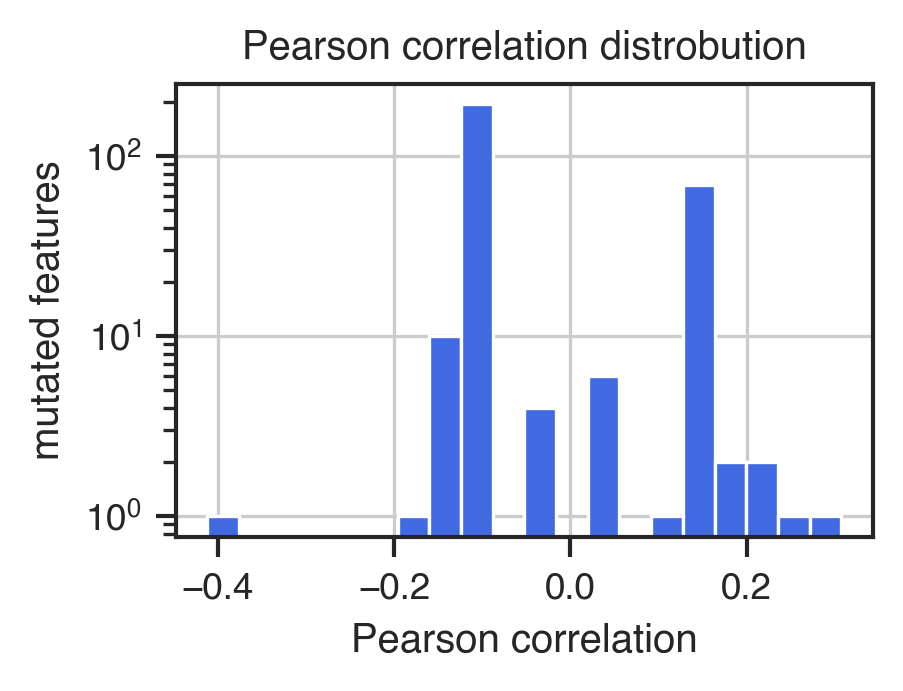

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] =300
sns.set_context("paper")
sns.set_style("ticks")

ax = cyaA_corr_df["cyaA"].hist(
    color="#4169e1",
    figsize=(3,2),
    bins=20
)
ax.set_yscale('log')

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")

ax.set_title("Pearson correlation distrobution", fontname="Helvetica")
ax.set_ylabel('mutated features', fontname="Helvetica")
ax.set_xlabel('Pearson correlation', fontname="Helvetica")

In [10]:
moderate_corr = cyaA_corr_df[cyaA_corr_df["cyaA"]>=0.2].index.to_list()  # "moderately correlated"
moderate_corr += cyaA_corr_df[cyaA_corr_df["cyaA"]<=-0.2].index.to_list()  # "moderately correlated"
moderate_corr

['glpK', 'hisL/hisG', 'rpoB', 'yrfF', 'crr']

In [11]:
df = pd.DataFrame(corr["cyaA"].loc[moderate_corr])
df = df[df.index!="cyaA"]
df

,cyaA
mutated feature,
glpK,0.259247
hisL/hisG,0.235256
rpoB,0.307592
yrfF,0.206548
crr,-0.411879


Text(0.5, 0, 'Pearson correlation')

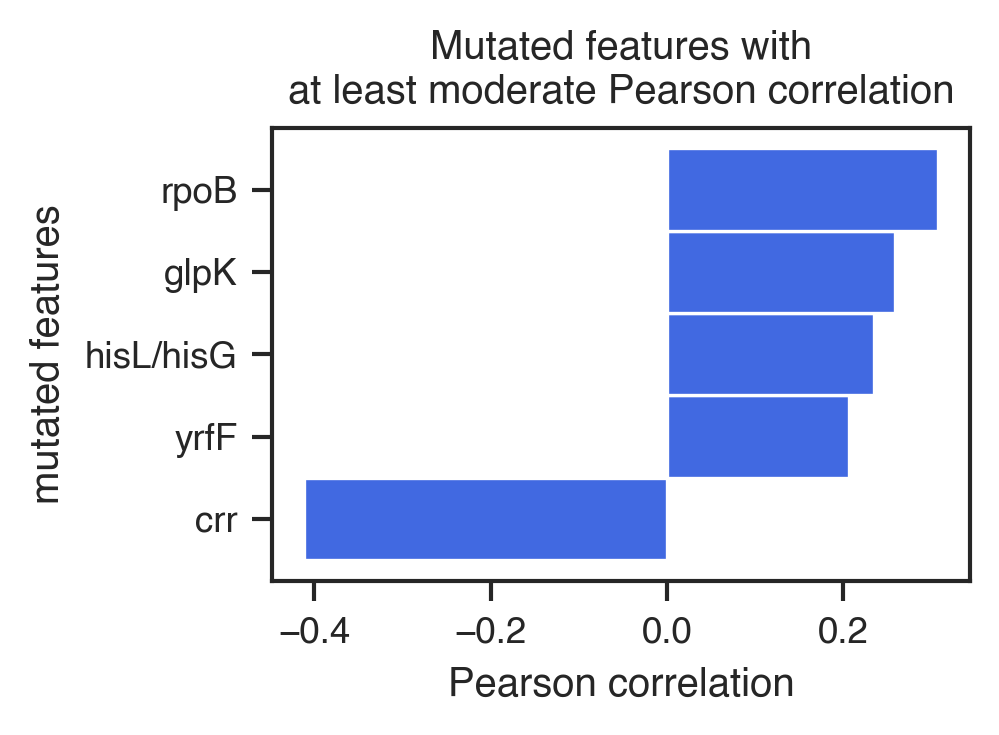

In [12]:
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")

df = df.sort_values(by="cyaA")
ax = df.plot.barh(
    color="#4169e1",
    figsize=(3,2),
#     figsize=(2,1),
    width=1
)
ax.get_legend().remove()

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")

ax.set_title("Mutated features with\nat least moderate Pearson correlation", fontname="Helvetica")
ax.set_ylabel('mutated features', fontname="Helvetica")
ax.set_xlabel('Pearson correlation', fontname="Helvetica")

# sns.despine(ax=ax, bottom=True, top=True, right=True, left=True)

In [13]:
l = ["cyaA", "crr", "crp"]
cyaA_crr_crp_corr_df = corr.loc[l, l]
cyaA_crr_crp_corr_df

mutated feature,cyaA,crr,crp
mutated feature,,,
cyaA,1.000000,-0.411879,-0.094200
crr,-0.411879,1.000000,-0.067267
crp,-0.094200,-0.067267,1.000000


(3, 1)

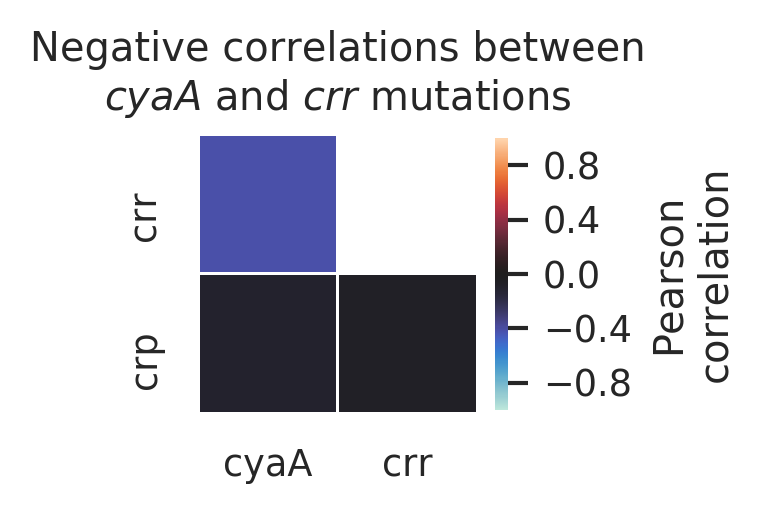

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("white")


# Generate a mask for the upper triangle
mask = np.zeros_like(cyaA_crr_crp_corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(
    figsize=(1.5, 1.5)
)

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cyaA_crr_crp_corr_df, mask=mask,
#             cmap=cmap,
            vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5,
            cbar_kws={
                "shrink": 0.8,
                "label": "Pearson\ncorrelation"
            }
           )
# ax.set_title("LaCroix $\it{et}$ $\it{al.}$ 2017\nkey mutated feature\ncorrelations")
ax.set_title("Negative correlations between\n$\it{cyaA}$ and $\it{crr}$ mutations")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xlim(0,2)
ax.set_ylim(3,1)
# plt.savefig("fig.svg", format="svg")